In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度，使数据和网络结构匹配
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print("x_train.shape", x_train.shape)




x_train.shape (60000, 28, 28)
x_train.shape (60000, 28, 28, 1)


In [2]:
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # 卷积层
        self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        self.d1 = Dropout(0.2)  # dropout层

        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y


model = Baseline()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.4818 - sparse_categorical_accuracy: 0.8247 - val_loss: 0.3608 - val_sparse_categorical_accuracy: 0.8706
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3507 - sparse_categorical_accuracy: 0.8716 - val_loss: 0.3151 - val_sparse_categorical_accuracy: 0.8863
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3110 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.3008 - val_sparse_categorical_accuracy: 0.8913
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2895 - sparse_categorical_accuracy: 0.8925 - val_loss: 0.2917 - val_sparse_categorical_accuracy: 0.8958
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2722 - sparse_categorical_accuracy: 0.8980 - val_loss: 0.2763 - val_sparse_categorical_accuracy: 0.9023
Model: "baseline"
_

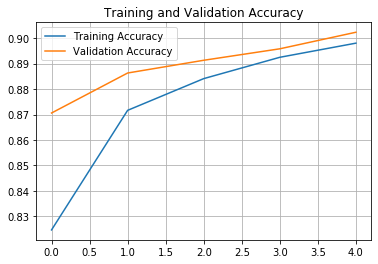

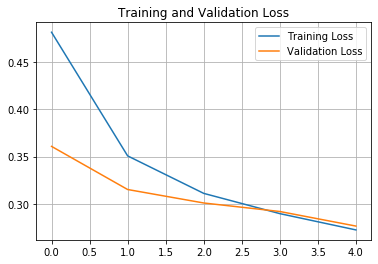

In [4]:
###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()

plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()